# MODELOS
Annette Pamela Ruiz Abreu - A01423595

In [391]:
# Librerías

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import KFold
from sklearn import tree

from IPython.display import Image as PImage
from subprocess import check_call


from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

from kneed import KneeLocator

import warnings
warnings.filterwarnings("ignore")


In [392]:
# Datos
datos = pd.read_excel("Datos Finales/EnjoyersV2.xlsx").drop(columns=["Unnamed: 0.1", "Unnamed: 0"])

In [393]:
datos.head()

Año  Mes  Progreso  Duración  P1.1  P1.2  P1.3  P1.4  P1.5  P1.6  ...  P3  \
0  2021    4       100       207     4     5     4     5     4     5  ...   1   
1  2021    4       100       168     4     4     4     4     2     4  ...   1   
2  2021    4       100       349     4     5     5     5     5     5  ...   1   
3  2021    4       100       245     5     5     5     3     3     5  ...   1   
4  2021    4       100       151     4     3     3     3     4     5  ...   1   

                                 Comentario para OSF  P5.1  P5.2 P5.3  P5.4  \
0  Me gustó mucho la causa a la que se estaba apo...     4     5    5     5   
1  Me gustó el servicio, pero me hubiera gustado ...     4     4    4     4   
2  Muchas gracias por el apoyo y la oportunidad d...     5     5    5     5   
3                ¡Muchas gracias por la experiencia!     5     5    5     5   
4                           Muchas gracias por todo.     4     4    4     4   

                                  Comentario general      Tipo comentario  \
0  Es complicado conseguir colaboraciones en esto...       Reconocimiento   
1  Pues ojalá que ahora sí me valgan mis horas, n...       Reconocimiento   
2  Lo único que me desagrado del servicio fue la ...  Área de oportunidad   
3  Me gusto mucho la experiencia por la apertura ...       Reconocimiento   
4  No sentí que mi trabajo tuviera impacto, fue m...  Área de oportunidad   

                                                 OSF  \
0                                  León Ortigosa ABP   
1                            Comenzar de Nuevo, A.C.   
2                 Casa Paterna La Gran Familia, A.C.   
3  Programa de Acompañamiento de Servicio Social,...   
4  Casa Monarca Ayuda Humanitaria al Migrante A.B.P.   

                                Comentario traducido  
0  It is difficult to get collaborations in these...  
1  Well, I hope that now my hours are worth it, n...  
2  The only thing I disliked about the service wa...  
3  I really liked the experience because of the o...  
4  I did not feel that my work had an impact, it ...  

[5 rows x 23 columns]

### Análisis de sentimiento

In [394]:
# Comenarios vacíos
datos["Comentario traducido"].fillna(".",inplace=True)

In [395]:
sentiment = SentimentIntensityAnalyzer()

datos["sentimiento"] = [sentiment.polarity_scores(datos["Comentario traducido"][i])["compound"] for i in range(10493)]


In [396]:
datos["sentimiento"].unique()


array([ 0.4767,  0.3979, -0.6249, ...,  0.7125,  0.7549,  0.3472])

In [397]:
datos.head()

Año  Mes  Progreso  Duración  P1.1  P1.2  P1.3  P1.4  P1.5  P1.6  ...  \
0  2021    4       100       207     4     5     4     5     4     5  ...   
1  2021    4       100       168     4     4     4     4     2     4  ...   
2  2021    4       100       349     4     5     5     5     5     5  ...   
3  2021    4       100       245     5     5     5     3     3     5  ...   
4  2021    4       100       151     4     3     3     3     4     5  ...   

                                 Comentario para OSF  P5.1  P5.2  P5.3 P5.4  \
0  Me gustó mucho la causa a la que se estaba apo...     4     5     5    5   
1  Me gustó el servicio, pero me hubiera gustado ...     4     4     4    4   
2  Muchas gracias por el apoyo y la oportunidad d...     5     5     5    5   
3                ¡Muchas gracias por la experiencia!     5     5     5    5   
4                           Muchas gracias por todo.     4     4     4    4   

                                  Comentario general      Tipo comentario  \
0  Es complicado conseguir colaboraciones en esto...       Reconocimiento   
1  Pues ojalá que ahora sí me valgan mis horas, n...       Reconocimiento   
2  Lo único que me desagrado del servicio fue la ...  Área de oportunidad   
3  Me gusto mucho la experiencia por la apertura ...       Reconocimiento   
4  No sentí que mi trabajo tuviera impacto, fue m...  Área de oportunidad   

                                                 OSF  \
0                                  León Ortigosa ABP   
1                            Comenzar de Nuevo, A.C.   
2                 Casa Paterna La Gran Familia, A.C.   
3  Programa de Acompañamiento de Servicio Social,...   
4  Casa Monarca Ayuda Humanitaria al Migrante A.B.P.   

                                Comentario traducido sentimiento  
0  It is difficult to get collaborations in these...      0.4767  
1  Well, I hope that now my hours are worth it, n...      0.3979  
2  The only thing I disliked about the service wa...     -0.6249  
3  I really liked the experience because of the o...      0.6697  
4  I did not feel that my work had an impact, it ...      0.0000  

[5 rows x 24 columns]

In [ ]:
datos.to_csv("Datos_sentimiento")

In [572]:
print("Comentarios buenos: ",len(datos[datos.sentimiento>0]))
print("Comentarios malos: ",len(datos[datos.sentimiento==0]))
print("Comentarios neutros: ",len(datos[datos.sentimiento<0]))


Comentarios buenos:  7475
Comentarios malos:  2584
Comentarios neutros:  434


In [465]:
pd.DataFrame(datos.columns, columns=["Nombre de columna"])

Nombre de columna
0                    Año
1                    Mes
2               Progreso
3               Duración
4                   P1.1
5                   P1.2
6                   P1.3
7                   P1.4
8                   P1.5
9                   P1.6
10                  P1.7
11                  P1.8
12                    P2
13                    P3
14   Comentario para OSF
15                  P5.1
16                  P5.2
17                  P5.3
18                  P5.4
19    Comentario general
20       Tipo comentario
21                   OSF
22  Comentario traducido
23           sentimiento

In [467]:
datos.shape

(10493, 24)

In [586]:
datos.describe().drop(columns=["Año", "Mes", "Progreso", "Duración"])

P1.1          P1.2          P1.3          P1.4          P1.5  \
count  10493.000000  10493.000000  10493.000000  10493.000000  10493.000000   
mean       4.532831      4.588488      4.561422      4.488897      4.304775   
std        0.738486      0.694533      0.719511      0.834810      0.945490   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        4.000000      4.000000      4.000000      4.000000      4.000000   
50%        5.000000      5.000000      5.000000      5.000000      5.000000   
75%        5.000000      5.000000      5.000000      5.000000      5.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

               P1.6          P1.7          P1.8            P2            P3  \
count  10493.000000  10493.000000  10493.000000  10493.000000  10493.000000   
mean       4.492328      4.473935      4.460974      0.845325      0.985038   
std        0.841104      0.866857      0.839893      0.361611      0.121408   
min        1.000000      1.000000      1.000000      0.000000      0.000000   
25%        4.000000      4.000000      4.000000      1.000000      1.000000   
50%        5.000000      5.000000      5.000000      1.000000      1.000000   
75%        5.000000      5.000000      5.000000      1.000000      1.000000   
max        5.000000      5.000000      5.000000      1.000000      1.000000   

               P5.1          P5.2          P5.3          P5.4   sentimiento  
count  10493.000000  10493.000000  10493.000000  10493.000000  10493.000000  
mean       4.599638      4.717907      4.723911      4.712761      0.434035  
std        0.701904      0.564130      0.576511      0.588220      0.361950  
min        1.000000      1.000000      1.000000      1.000000     -0.962100  
25%        4.000000      5.000000      5.000000      5.000000      0.000000  
50%        5.000000      5.000000      5.000000      5.000000      0.476700  
75%        5.000000      5.000000      5.000000      5.000000      0.734600  
max        5.000000      5.000000      5.000000      5.000000      0.993200

## NLP

In [575]:
import nltk
from nltk.corpus import cess_esp
import nltk.tokenize
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import es_core_news_sm
nlp = es_core_news_sm.load()

In [647]:
stopword = stopwords.words('english') + ["able", "many", "social", "know", "little", "need", "give", "gave", "continue", "much", "several", "service", "project", "experience"]

In [577]:
# Pasar de lista a string
coment = ""
for i in datos["Comentario traducido"]:
    coment = coment + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(coment)
tokenized_words = [i.lower() for i in tokenized if (i.isalpha() and len(i)>2)]

no_stopwords = [i for i in tokenized_words if i not in stopword]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

In [578]:
counter = Counter(lemmatized)
contador = pd.DataFrame(dict(counter), index=[0]).transpose().reset_index().rename(columns={"index":"Palabra",0:"Repetición"}).sort_values("Repetición", ascending = False).reset_index(drop=True)
tagged_sent = nltk.pos_tag(lemmatized)



In [579]:
counter2 = Counter(tagged_sent)
contador2 = pd.DataFrame(dict(counter2), index=[0]).transpose().reset_index().rename(columns={"level_0":"Palabra","level_1":"Tipo de palabra",0:"Repetición"}).sort_values("Repetición", ascending = False).reset_index(drop=True)
contador2.head()

Palabra Tipo de palabra  Repetición
0  experience              NN        1871
1      really              RB        1514
2        good              JJ        1332
3     service              NN        1250
4       liked             VBD        1117

In [580]:
c = contador2[(contador2["Tipo de palabra"]=="JJ")|(contador2["Tipo de palabra"]=="VB")|(contador2["Tipo de palabra"]=="VBD")|(contador2["Tipo de palabra"]=="VBG")|(contador2["Tipo de palabra"]=="VBN")|(contador2["Tipo de palabra"]=="VBP")|(contador2["Tipo de palabra"]=="VBZ")]
c = pd.DataFrame(c.groupby(by="Palabra")["Repetición"].sum()).sort_values("Repetición", ascending=False)
c.head(15)


Repetición
Palabra                
liked              2158
good               1344
interesting         626
learned             537
great               453
loved               451
different           407
think               384
learning            380
helped              336
learn               312
make                308
made                306
new                 277
nice                275

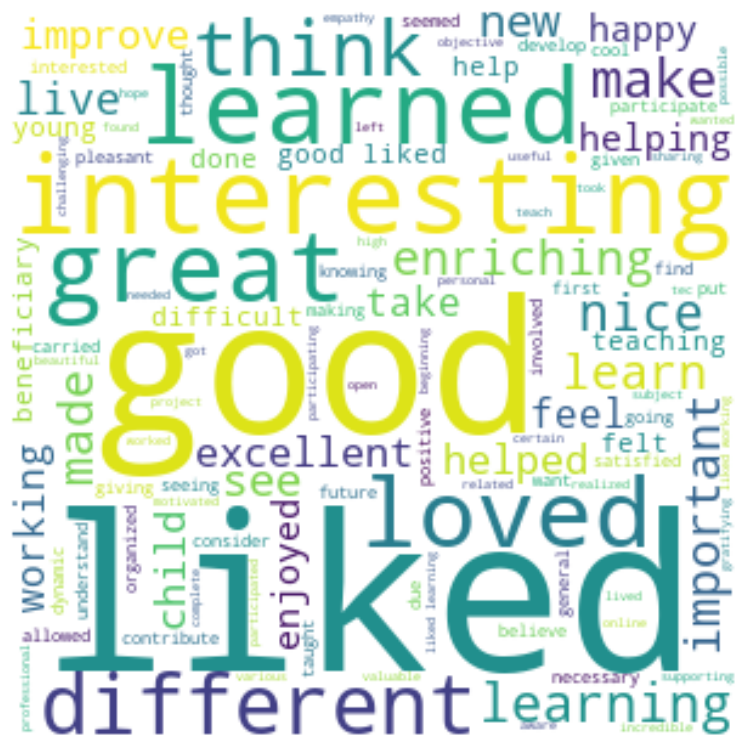

In [581]:
s = ""
for i in tagged_sent:
    if ((i[1]=="JJ") | (i[1]=="VB") | (i[1]=="VBD") | (i[1]=="VBG") | (i[1]=="VBN") | (i[1]=="VBP")):
        s+=i[0]+" "

from wordcloud import WordCloud

wc = WordCloud(width = 300, height = 300, background_color = "white").generate(s)

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()


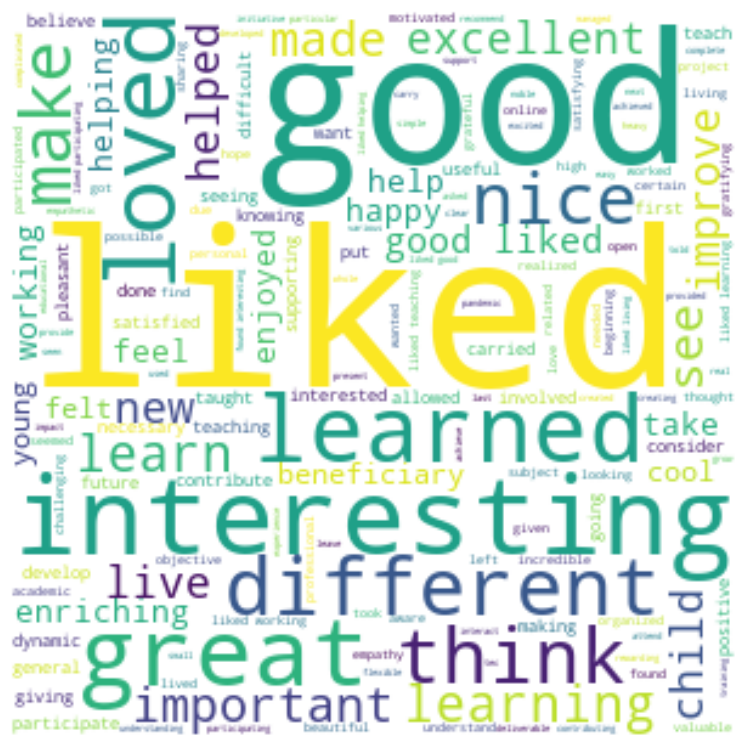

In [584]:
buenos = datos[datos.sentimiento>0]["Comentario traducido"]
# Pasar de lista a string
coments_buenos = ""
for i in buenos:
    coments_buenos = coments_buenos + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(coments_buenos)
tokenized_words = [i.lower() for i in tokenized if (i.isalpha() and len(i)>2)]

no_stopwords = [i for i in tokenized_words if i not in stopword]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

tagged_sent = nltk.pos_tag(lemmatized)

s = ""
for i in tagged_sent:
    if ((i[1]=="JJ") | (i[1]=="VB") | (i[1]=="VBD") | (i[1]=="VBG") | (i[1]=="VBN") | (i[1]=="VBP")):
        s+=i[0]+" "

from wordcloud import WordCloud

wc = WordCloud(width = 300, height = 300, background_color = "white").generate(s)

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()



In [573]:
malos = datos[datos.sentimiento<0]["Comentario traducido"]


In [569]:
stopword_malos = stopword + ["good", "liked", "learn", "learned"]

In [570]:
# Pasar de lista a string
coments_malos = ""
for i in malos:
    coments_malos = coments_malos + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(coments_malos)
tokenized_words = [i.lower() for i in tokenized if (i.isalpha() and len(i)>2)]

no_stopwords = [i for i in tokenized_words if i not in stopword_malos]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

tagged_sent = nltk.pos_tag(lemmatized)

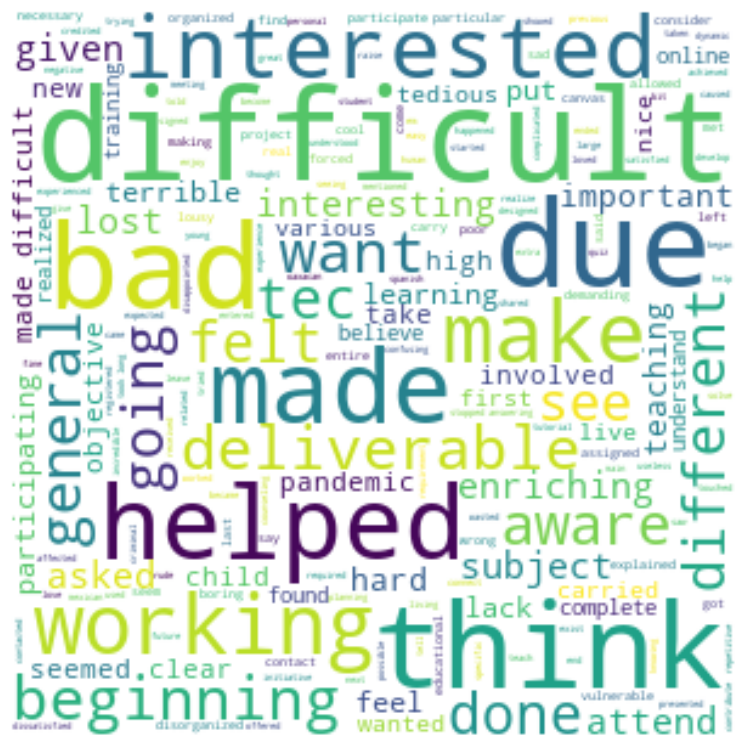

In [571]:
s = ""
for i in tagged_sent:
    if ((i[1]=="JJ") | (i[1]=="VB") | (i[1]=="VBD") | (i[1]=="VBG") | (i[1]=="VBN") | (i[1]=="VBP")):
        s+=i[0]+" "

from wordcloud import WordCloud

wc = WordCloud(width = 300, height = 300, background_color = "white").generate(s)

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()

## Regresión lineal

Se intentará predecir la columna P1.1 que pregunta sobre qué tan satisfecho está el alumno

In [587]:
X = datos.drop(columns=["Duración", "P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido"])
Y = datos["P1.1"]


In [588]:
label_encoder = LabelEncoder()
labels = {}

X["Tipo comentario"] = label_encoder.fit_transform(datos["Tipo comentario"])

X.head()



Año  Mes  P1.2  P1.3  P1.4  P1.5  P1.6  P1.7  P1.8  P2  P3  P5.1  P5.2  \
0  2021    4     5     4     5     4     5     5     5   1   1     4     5   
1  2021    4     4     4     4     2     4     4     1   1   1     4     4   
2  2021    4     5     5     5     5     5     5     4   1   1     5     5   
3  2021    4     5     5     3     3     5     5     5   1   1     5     5   
4  2021    4     3     3     3     4     5     5     2   1   1     4     4   

   P5.3  P5.4  Tipo comentario  sentimiento  
0     5     5                0       0.4767  
1     4     4                0       0.3979  
2     5     5                1      -0.6249  
3     5     5                0       0.6697  
4     4     4                1       0.0000

In [589]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=9)

In [590]:
# Create an instance of the Linear Regression model
reg = LinearRegression()

# Fit the data to the Linear Regression model (train the model)
reg.fit(X_train,Y_train)


LinearRegression()

In [591]:
pd.DataFrame(reg.coef_, index=X.columns, columns =["Coeficients"])

Coeficients
Año                 0.026779
Mes                 0.002091
P1.2                0.331702
P1.3                0.149126
P1.4                0.089898
P1.5                0.009617
P1.6                0.217646
P1.7                0.073005
P1.8                0.043137
P2                 -0.003602
P3                  0.035657
P5.1                0.002186
P5.2                0.010720
P5.3                0.009051
P5.4                0.005450
Tipo comentario    -0.011829
sentimiento         0.051109

In [592]:
pd.DataFrame([reg.intercept_], columns =["Intercept"])

Intercept
0 -53.944193

In [601]:
predictions = reg.predict(X_test)

In [603]:
test_rmse = np.sqrt(mean_squared_error(Y_test,predictions))

# Determination coeficient (R2)
test_r2sc = r2_score(Y_test, predictions)

# Remember the lower the value is the better it is
print("Square root of the mean squared error",test_rmse)


# The closer to 1 the better
print("Determination Coeficient",test_r2sc)

Square root of the mean squared error 0.38537523435784365
Determination Coeficient 0.7252759554514773


In [604]:
print(f"Accuracy on test set: {round(reg.score(X_test,Y_test),2)}")

Accuracy on test set: 0.73


In [605]:
print(predictions)

[3.91763634 4.78844151 3.99945347 ... 4.95391175 4.99920347 4.71208895]


In [632]:
import statsmodels.api as sm
import pandas as pd



# Agregar una constante a la matriz de variables independientes
X = sm.add_constant(X_train)

# Ajustar el modelo de regresión lineal
model = sm.OLS(Y_train, X).fit()

# Obtener los coeficientes de regresión
coefficients = model.params

# Imprimir los coeficientes y su significancia estadística
pesos = {}
for i, variable in enumerate(X.columns):
    pesos[variable] = model.pvalues[i]
    #print(f'Variable: {variable}, Coeficiente: {coefficients[i]}, P-valor: {model.pvalues[i]}')


pesos_df = pd.DataFrame(pesos, index=[0]).transpose().rename(columns={0:"Peso"}).sort_values("Peso", ascending=False)
pesos_df


Peso
P5.1              8.026648e-01
P2                7.809494e-01
P5.4              6.481014e-01
P5.3              4.448655e-01
P5.2              4.252383e-01
P3                3.276729e-01
Mes               1.572442e-01
P1.5              9.281398e-02
Tipo comentario   8.232113e-02
const             1.409218e-04
sentimiento       1.407544e-04
Año               1.323708e-04
P1.8              1.694605e-08
P1.7              6.212100e-14
P1.4              7.313204e-29
P1.3              3.693577e-56
P1.6              5.569517e-96
P1.2             1.347215e-216

## Árboles de decisión

In [408]:
# Búsqueda del mejor árbol de decisión

cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(datos))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(datos):
        f_train = datos.loc[train_fold] 
        f_valid = datos.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(["Duración", "P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"], axis=1), 
                               y = f_train["P1.1"]) 
        valid_acc = model.score(X = f_valid.drop(["Duración", "P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"], axis=1), 
                                y = f_valid["P1.1"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))


 Max Depth  Average Accuracy
         1          0.805598
         2          0.818368
         3          0.822942
         4          0.824180
         5          0.828088
         6          0.829136
         7          0.825990
         8          0.824656
         9          0.823415
        10          0.823129
        11          0.817506
        12          0.814742
        13          0.813598
        14          0.813693
        15          0.812645
        16          0.811692
        17          0.811978
        18          0.812359
        19          0.811597
        20          0.812073
        21          0.811311
        22          0.811882
        23          0.812073
        24          0.812264


In [409]:
print("Max Depth Elegido: ",df["Max Depth"][df["Average Accuracy"] == df["Average Accuracy"].max()].values)

Max Depth Elegido:  [6]


In [410]:
# Creación del árbol de decisión
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y = datos['P1.1'].values 
x = datos.drop(["Duración","P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"], axis=1).values 


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=9)


# Crear Arbol de decision con profundidad = 6
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 6,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train)

# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 6,
                              impurity = True,
                              feature_names = list(datos.drop(["Duración", "P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"], axis=1)),
                              # class_names = ['No', 'N1 Billboard'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
import subprocess
from PIL import Image

# ...

# Convertir el archivo .dot a .png
subprocess.run(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png'], check=True)

# Mostrar la imagen
image = Image.open('tree1.png')
image.show()



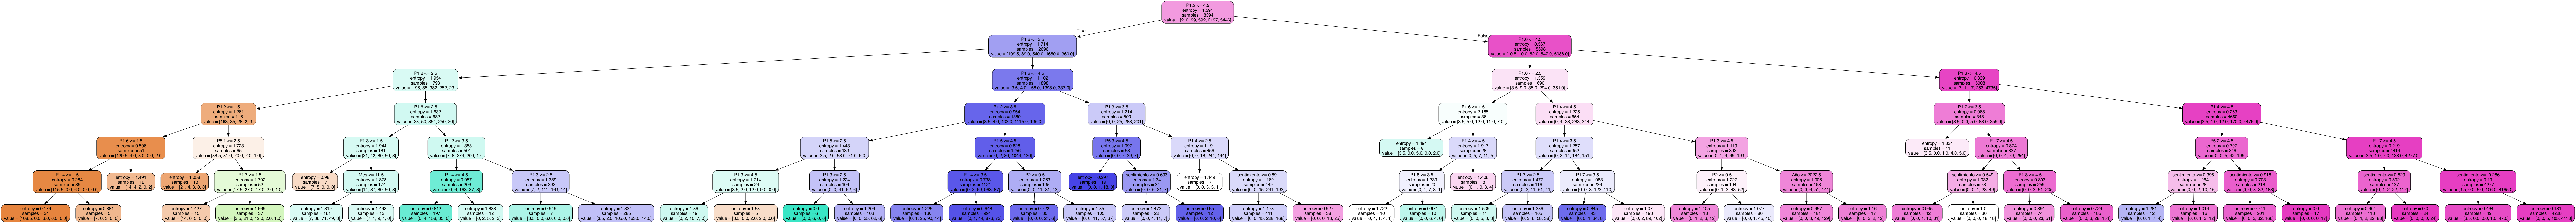

In [411]:
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

In [633]:
# Precisión
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print("Accuracy:",acc_decision_tree)

Accuracy: 84.04


In [413]:
y_pred = decision_tree.predict(x_test)



In [414]:
reporte = classification_report(y_test, y_pred)
print(reporte)

              precision    recall  f1-score   support

           1       0.62      0.62      0.62        21
           2       0.40      0.20      0.27        20
           3       0.54      0.51      0.53       120
           4       0.75      0.75      0.75       600
           5       0.91      0.92      0.92      1338

    accuracy                           0.84      2099
   macro avg       0.64      0.60      0.62      2099
weighted avg       0.84      0.84      0.84      2099



In [415]:
C = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[1, 2, 3, 4, 5], columns=[1, 2, 3, 4, 5])
print("Matriz de confusión\n")
display(C)
display(C / C.astype(np.float).sum(axis=0))


Matriz de confusión



1  2   3    4     5
1  13  2   5    1     0
2   2  4  12    2     0
3   5  2  61   48     4
4   1  1  30  450   118
5   0  1   4  100  1233

1    2         3         4         5
1  0.619048  0.2  0.044643  0.001664  0.000000
2  0.095238  0.4  0.107143  0.003328  0.000000
3  0.238095  0.2  0.544643  0.079867  0.002952
4  0.047619  0.1  0.267857  0.748752  0.087085
5  0.000000  0.1  0.035714  0.166389  0.909963

## SVM

## Naive Bayes

## K-means

In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [417]:
X = np.array(datos.drop(columns=["Año", "Mes", "Duración", "P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"]))
y = np.array(datos["P1.1"])
X.shape

(10493, 14)

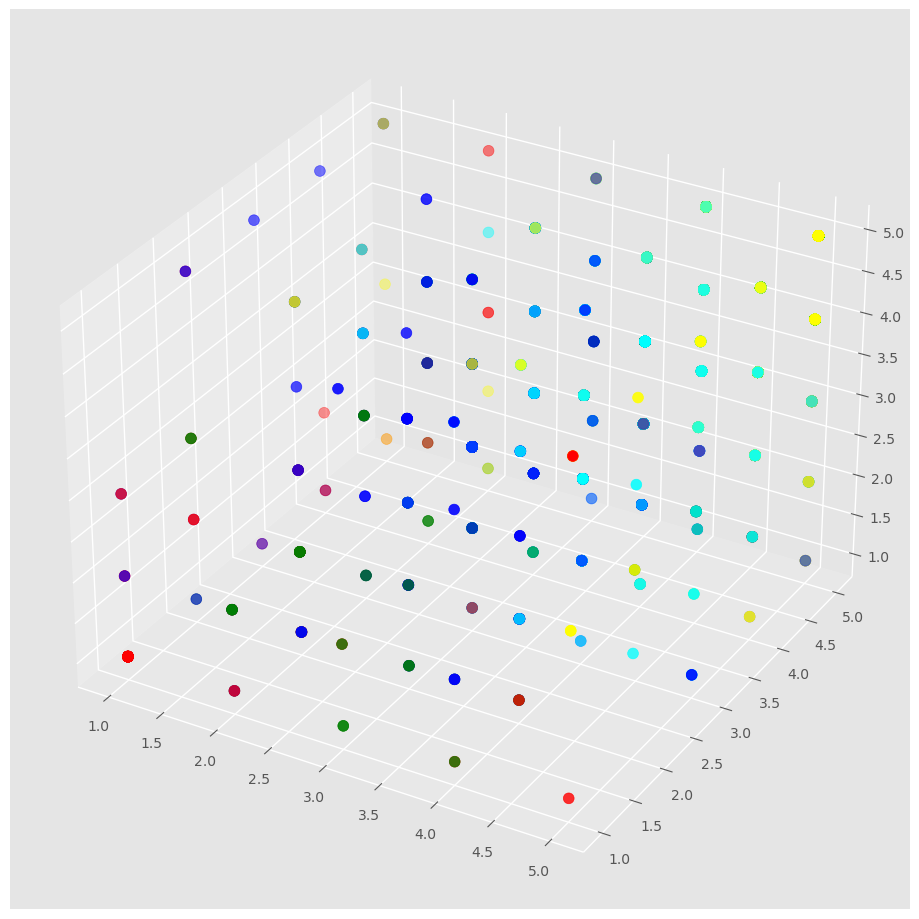

In [418]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1. 
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

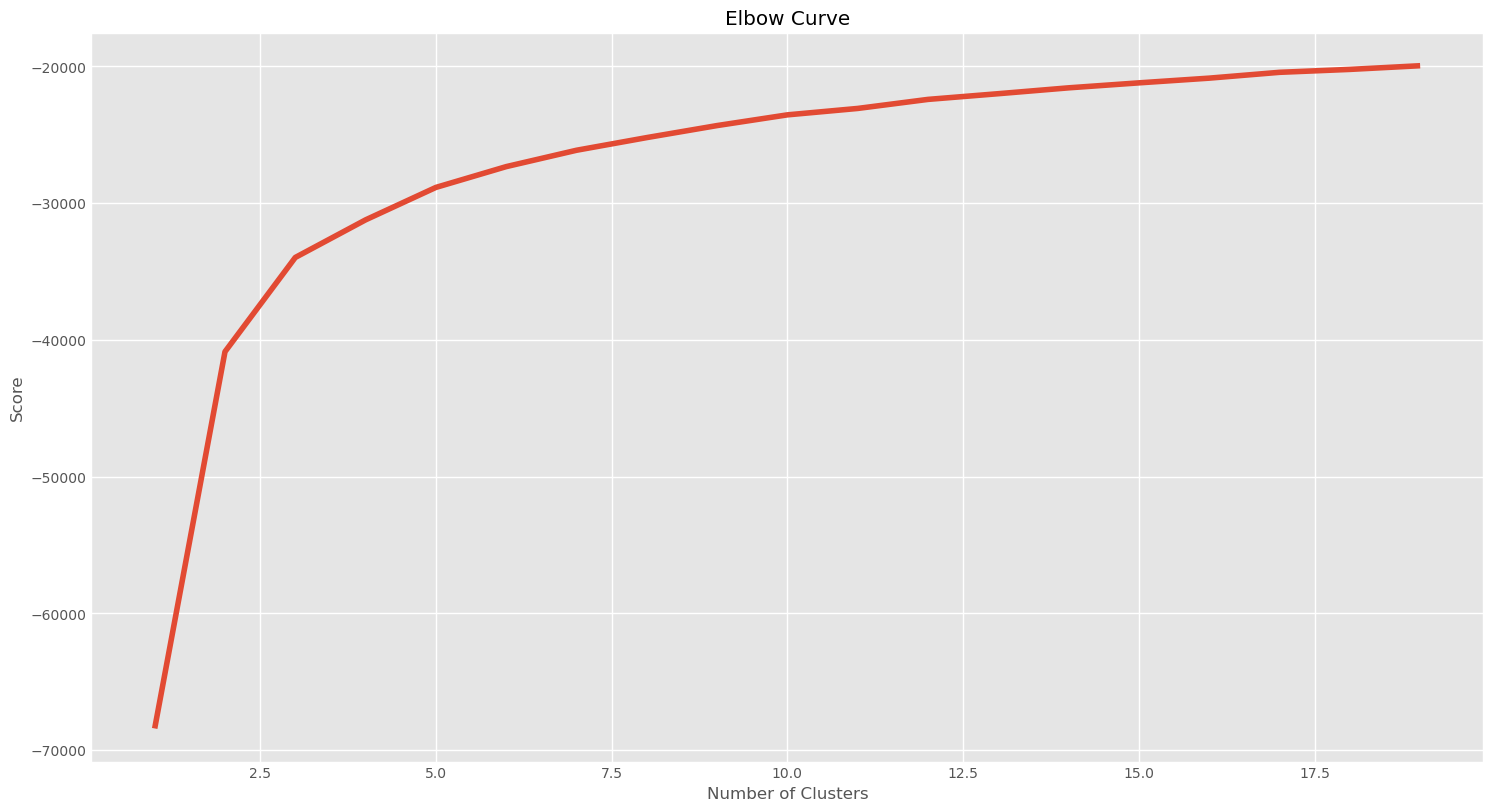

In [419]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [420]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[4.73302872 4.67819843 4.6462141  3.42036554 4.77219321 4.7421671
  4.4464752  0.8883812  0.99869452 4.67885117 4.85966057 4.86618799
  4.85509138 0.48402637]
 [4.0274056  3.99695493 3.90682095 3.74482339 3.99878197 3.98294762
  3.96041413 0.80816078 0.98051157 3.82764921 4.04384896 4.04445798
  4.01035323 0.37034513]
 [4.95853917 4.94336627 4.93560339 4.94883557 4.95483416 4.95430487
  4.93824982 0.92519407 0.99841214 4.88690896 4.95377558 4.94830628
  4.95236415 0.47715231]
 [4.15173026 4.08251996 3.8216504  3.84915705 3.51286602 3.42679681
  3.6433008  0.635315   0.98491571 4.7675244  4.87932564 4.92014197
  4.90239574 0.37595803]
 [2.86068702 2.88740458 2.45610687 2.65839695 2.32442748 2.28435115
  2.66793893 0.42366412 0.8148855  3.31870229 3.51717557 3.58778626
  3.4980916  0.14597653]]


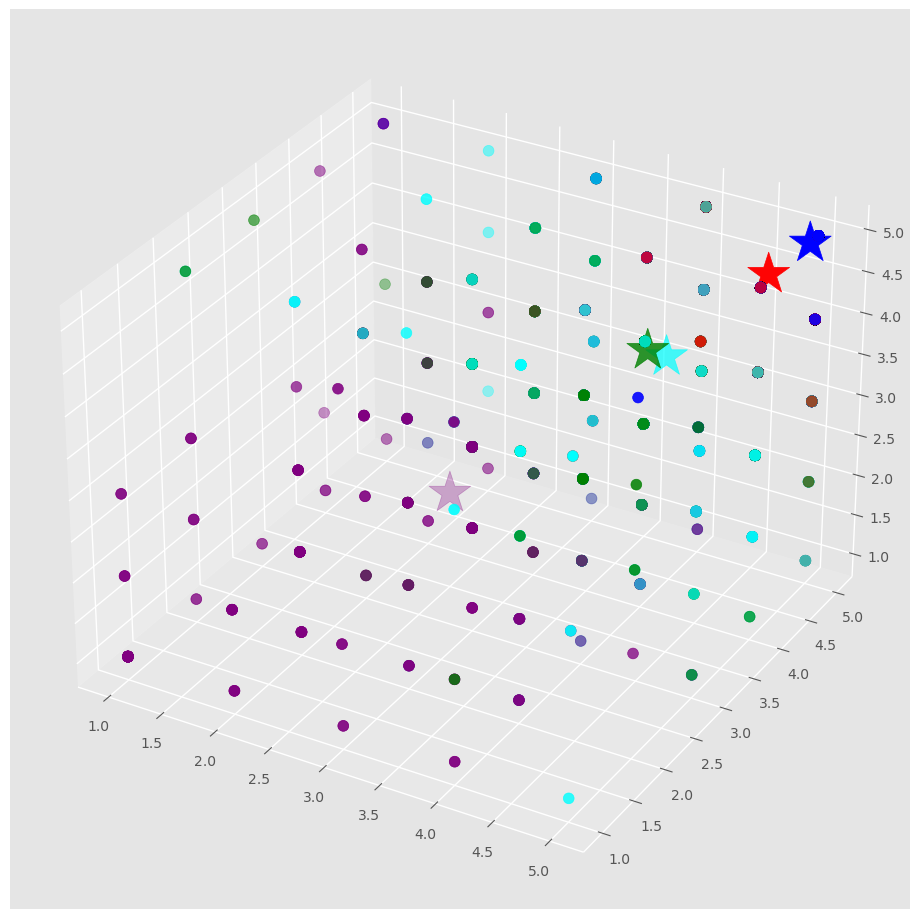

In [421]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','blue', 'cyan', 'purple']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [422]:
copy =  pd.DataFrame()
copy['OSF']=datos['OSF'].values
copy['categoria']=datos['P1.1'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cluster']=["grupo1", "grupo2", "grupo3", "group4", "group5"]
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

cluster  cantidad
0  grupo1      1533
1  grupo2      1642
2  grupo3      5668
3  group4      1126
4  group5       524

In [423]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo.drop(index=[0, 1, 2], inplace=True)

In [424]:
diversidadGrupo

categoria  cantidad
3          3      26.0
4          4     422.0
5          5    1085.0

In [425]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([1170,  524,  976, 1305, 3333])

In [634]:
print("REPRESENTANTES DE CADA CLUSTER")
users=datos['OSF'].values
for row in closest:
    print(users[row])

REPRESENTANTES DE CADA CLUSTER
Dirección de Servicio Social
CONAFE, Consejo Nacional de Fomento Educativo
Hagámoslo Bien por una Cultura de la Legalidad, A.C.
Dirección de Servicio Social
SAIIS, Sociedad de Alumnos de Ingeniero Industrial y de Sistemas


In [427]:
for i in closest:
    display(pd.DataFrame(datos.iloc[i]))

1170
Año                                                                2021
Mes                                                                   7
Progreso                                                            100
Duración                                                            211
P1.1                                                                  5
P1.2                                                                  5
P1.3                                                                  5
P1.4                                                                  5
P1.5                                                                  3
P1.6                                                                  5
P1.7                                                                  5
P1.8                                                                  4
P2                                                                    1
P3                                                                    1
Comentario para OSF   Creo que en caso de que quieran realizar el pr...
P5.1                                                                  5
P5.2                                                                  5
P5.3                                                                  5
P5.4                                                                  5
Comentario general    Fue muy interesante y educativo para poder for...
Tipo comentario                                          Reconocimiento
OSF                                        Dirección de Servicio Social
Comentario traducido  It was very interesting and educational to be ...
sentimiento                                                      0.4576

524
Año                                                                2021
Mes                                                                   6
Progreso                                                            100
Duración                                                             87
P1.1                                                                  4
P1.2                                                                  4
P1.3                                                                  4
P1.4                                                                  4
P1.5                                                                  4
P1.6                                                                  4
P1.7                                                                  4
P1.8                                                                  4
P2                                                                    1
P3                                                                    1
Comentario para OSF     Me gusto mucho, pero fueron muchos entregables 
P5.1                                                                  4
P5.2                                                                  4
P5.3                                                                  4
P5.4                                                                  4
Comentario general     Estuvo padre, pero te piden muchos entregables. 
Tipo comentario                                     Área de oportunidad
OSF                       CONAFE, Consejo Nacional de Fomento Educativo
Comentario traducido  It was great, but they ask you for many delive...
sentimiento                                                      0.3716

976
Año                                                                2021
Mes                                                                   6
Progreso                                                            100
Duración                                                            120
P1.1                                                                  5
P1.2                                                                  5
P1.3                                                                  5
P1.4                                                                  5
P1.5                                                                  5
P1.6                                                                  5
P1.7                                                                  5
P1.8                                                                  5
P2                                                                    1
P3                                                                    1
Comentario para OSF   Fue muy interesante y retadora al mismo tiempo...
P5.1                                                                  5
P5.2                                                                  5
P5.3                                                                  5
P5.4                                                                  5
Comentario general    Todo estuvo excelente, desde la problemática a...
Tipo comentario                                          Reconocimiento
OSF                   Hagámoslo Bien por una Cultura de la Legalidad...
Comentario traducido  Everything was excellent, from the problem to ...
sentimiento                                                      0.4767

1305
Año                                                                2021
Mes                                                                   7
Progreso                                                            100
Duración                                                            147
P1.1                                                                  4
P1.2                                                                  4
P1.3                                                                  4
P1.4                                                                  4
P1.5                                                                  4
P1.6                                                                  4
P1.7                                                                  3
P1.8                                                                  4
P2                                                                    1
P3                                                                    1
Comentario para OSF   Es muy dificil con el compromiso de algunos es...
P5.1                                                                  5
P5.2                                                                  5
P5.3                                                                  5
P5.4                                                                  5
Comentario general    Es primera vez que soy profesor y me siento fe...
Tipo comentario                                          Reconocimiento
OSF                                        Dirección de Servicio Social
Comentario traducido  It is the first time that I am a teacher and I...
sentimiento                                                      0.5719

3333
Año                                                                2021
Mes                                                                  11
Progreso                                                            100
Duración                                                          14334
P1.1                                                                  4
P1.2                                                                  3
P1.3                                                                  3
P1.4                                                                  3
P1.5                                                                  3
P1.6                                                                  3
P1.7                                                                  2
P1.8                                                                  2
P2                                                                    0
P3                                                                    1
Comentario para OSF   Mayor seguimiento y atención para poder realiz...
P5.1                                                                  3
P5.2                                                                  4
P5.3                                                                  4
P5.4                                                                  4
Comentario general    A veces faltaba compromiso por parte de la esc...
Tipo comentario                                     Área de oportunidad
OSF                   SAIIS, Sociedad de Alumnos de Ingeniero Indust...
Comentario traducido  Sometimes there was a lack of commitment from ...
sentimiento                                                      -0.296

In [428]:
X_new = np.array([[5, 5, 2, 4, 3, 4, 4, 0, 1, 1, 1, 1, 1, 0.7]])
new_labels = kmeans.predict(X_new)
print(new_labels)


[4]


## K-means comment clustering

In [658]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [659]:
# Clustering using TfidfVectorizer method
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(datos["Comentario traducido"])
tf_idf_array = tf_idf.toarray()

In [660]:
kmeans = KMeans(n_clusters=3, algorithm = 'auto') 
kmeans.fit(tf_idf_array)
KMeans(n_clusters=3)
cluster_assignment = kmeans.labels_
clustered_sentences = [[] for i in range(3)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(datos["Comentario traducido"][sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['It is difficult to get collaborations in these times of pandemic, but this service taught me and helped improve my way of communicating with businesses and working as a team', "Well, I hope that now my hours are worth it, not like last semester when I did a whole semester and they didn't give me a measly hour, I don't like them", 'The only thing I disliked about the service was the lack of collaboration from my teammates, since they rarely attended meetings with the training partner, did not participate in the development of the challenge, and did not complete their parts of the job on time.\nIt saddened me to see the lack of motivation and empathy from my colleagues when working for a social cause. I truly believe that something should be done about it.', 'I did not feel that my work had an impact, it was very little that I did.', 'It is a project that sometimes requires work and dedication, but it is an experience that helps develop your social skills and your role in th

In [661]:
clustered_sentences_df = pd.DataFrame()
clustered_sentences_df["cluster"] = range(1, 4)
clustered_sentences_df["cantidad"] = 0
for i in range(3):
    clustered_sentences_df["cantidad"][i] = len(clustered_sentences[i])

clustered_sentences_df


cluster  cantidad
0        1      8484
1        2      1627
2        3       382

In [662]:
kmeans = KMeans(n_clusters=5, algorithm = 'auto') 
kmeans.fit(tf_idf_array)
KMeans(n_clusters=5)
cluster_assignment = kmeans.labels_
clustered_sentences = [[] for i in range(5)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(datos["Comentario traducido"][sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['It is difficult to get collaborations in these times of pandemic, but this service taught me and helped improve my way of communicating with businesses and working as a team', "Well, I hope that now my hours are worth it, not like last semester when I did a whole semester and they didn't give me a measly hour, I don't like them", 'The only thing I disliked about the service was the lack of collaboration from my teammates, since they rarely attended meetings with the training partner, did not participate in the development of the challenge, and did not complete their parts of the job on time.\nIt saddened me to see the lack of motivation and empathy from my colleagues when working for a social cause. I truly believe that something should be done about it.', 'I did not feel that my work had an impact, it was very little that I did.', '.', '.', 'I loved it, especially because it is with animals.', '.', '.', 'Despite the current situation we are experiencing and the distance, 

In [663]:
clustered_sentences_df = pd.DataFrame()
clustered_sentences_df["cluster"] = range(1,6)
clustered_sentences_df["cantidad"] = 0
for i in range(5):
    clustered_sentences_df["cantidad"][i] = len(clustered_sentences[i])

clustered_sentences_df



cluster  cantidad
0        1      6861
1        2       883
2        3      1415
3        4      1051
4        5       283

In [664]:
sentiment_values = []
for y in range(5):
    sentiment_values_y = [sentiment.polarity_scores(i)["compound"] for i in clustered_sentences[y]]
    sentiment_values.append(sentiment_values_y)

In [673]:
clustered_sentences_df["promedio sentimiento"] = 0
clustered_sentences_df["length promedio"] = 0
a = -1
for i in clustered_sentences:
    suma = 0
    s = 0
    c = 0
    a+=1
    for y in i:
        s += len(y)
        suma += sentiment.polarity_scores(y)["compound"]
        c += 1
    promedio = suma/c
    p = s/c
    clustered_sentences_df["promedio sentimiento"][a] = promedio
    clustered_sentences_df["length promedio"][a] = p


In [674]:
clustered_sentences_df

cluster  cantidad  promedio sentimiento  length promedio
0        1      6861              0.359332        94.572366
1        2       883              0.572854       159.919592
2        3      1415              0.618250       106.007774
3        4      1051              0.539216       107.878211
4        5       283              0.500288        19.494700

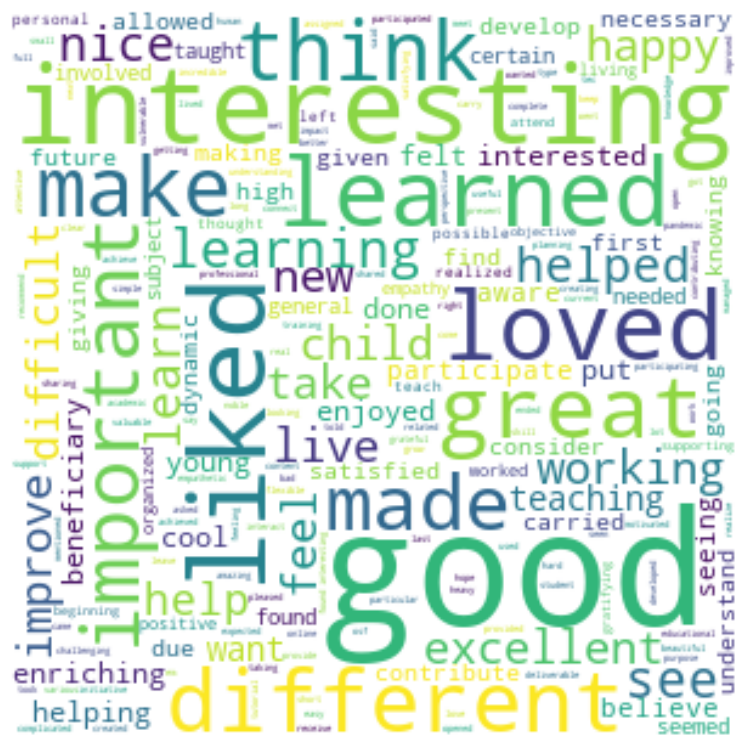

In [667]:
# CLUSTER 1

# Pasar de lista a string
cluster = ""
for i in clustered_sentences[0]:
    cluster = cluster + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(cluster)
tokenized_words = [i.lower() for i in tokenized if (i.isalpha() and len(i)>2)]

no_stopwords = [i for i in tokenized_words if i not in stopword]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

tagged_sent = nltk.pos_tag(lemmatized)

s = ""
for i in tagged_sent:
    if ((i[1]=="JJ") | (i[1]=="VB") | (i[1]=="VBD") | (i[1]=="VBG") | (i[1]=="VBN") | (i[1]=="VBP")):
        s+=i[0]+" "

from wordcloud import WordCloud

wc = WordCloud(width = 300, height = 300, background_color = "white").generate(s)

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()

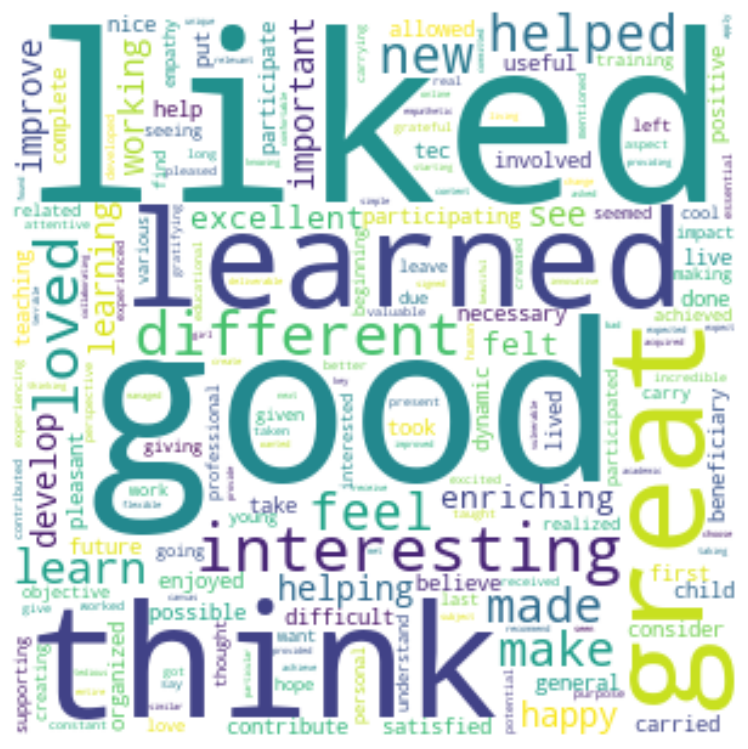

In [668]:
# CLUSTER 2

# Pasar de lista a string
cluster = ""
for i in clustered_sentences[1]:
    cluster = cluster + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(cluster)
tokenized_words = [i.lower() for i in tokenized if (i.isalpha() and len(i)>2)]

no_stopwords = [i for i in tokenized_words if i not in stopword]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

tagged_sent = nltk.pos_tag(lemmatized)

s = ""
for i in tagged_sent:
    if ((i[1]=="JJ") | (i[1]=="VB") | (i[1]=="VBD") | (i[1]=="VBG") | (i[1]=="VBN") | (i[1]=="VBP")):
        s+=i[0]+" "

from wordcloud import WordCloud

wc = WordCloud(width = 300, height = 300, background_color = "white").generate(s)

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()

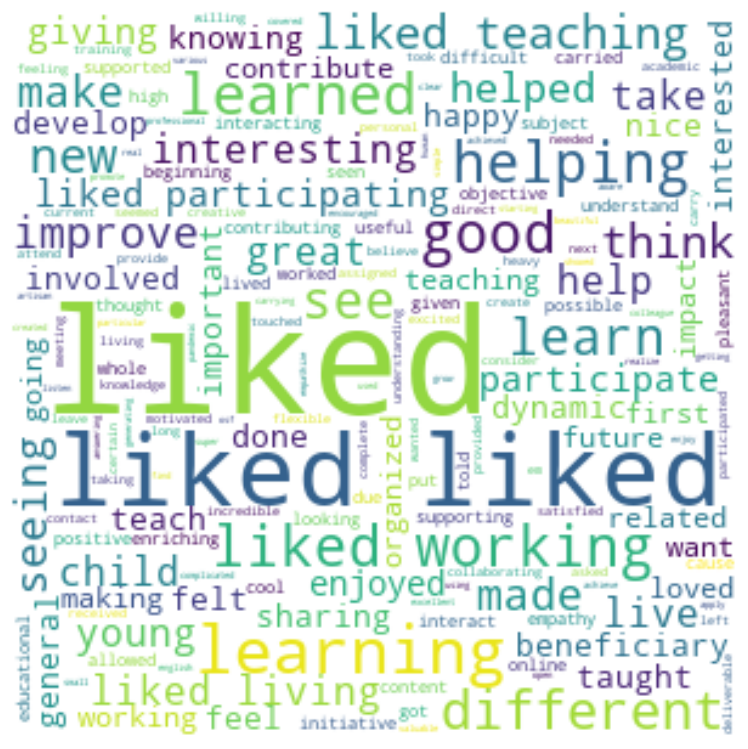

In [669]:
# CLUSTER 3

# Pasar de lista a string
cluster = ""
for i in clustered_sentences[2]:
    cluster = cluster + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(cluster)
tokenized_words = [i.lower() for i in tokenized if (i.isalpha() and len(i)>2)]

no_stopwords = [i for i in tokenized_words if i not in stopword]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

tagged_sent = nltk.pos_tag(lemmatized)

s = ""
for i in tagged_sent:
    if ((i[1]=="JJ") | (i[1]=="VB") | (i[1]=="VBD") | (i[1]=="VBG") | (i[1]=="VBN") | (i[1]=="VBP")):
        s+=i[0]+" "

from wordcloud import WordCloud

wc = WordCloud(width = 300, height = 300, background_color = "white").generate(s)

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()

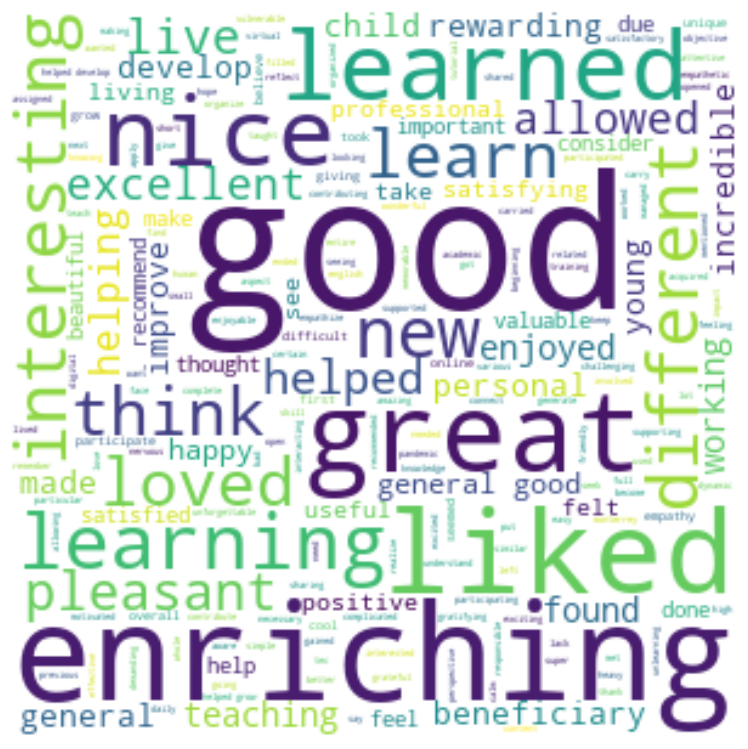

In [670]:
# CLUSTER 4

# Pasar de lista a string
cluster = ""
for i in clustered_sentences[3]:
    cluster = cluster + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(cluster)
tokenized_words = [i.lower() for i in tokenized if (i.isalpha() and len(i)>2)]

no_stopwords = [i for i in tokenized_words if i not in stopword]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

tagged_sent = nltk.pos_tag(lemmatized)

s = ""
for i in tagged_sent:
    if ((i[1]=="JJ") | (i[1]=="VB") | (i[1]=="VBD") | (i[1]=="VBG") | (i[1]=="VBN") | (i[1]=="VBP")):
        s+=i[0]+" "

from wordcloud import WordCloud

wc = WordCloud(width = 300, height = 300, background_color = "white").generate(s)

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()

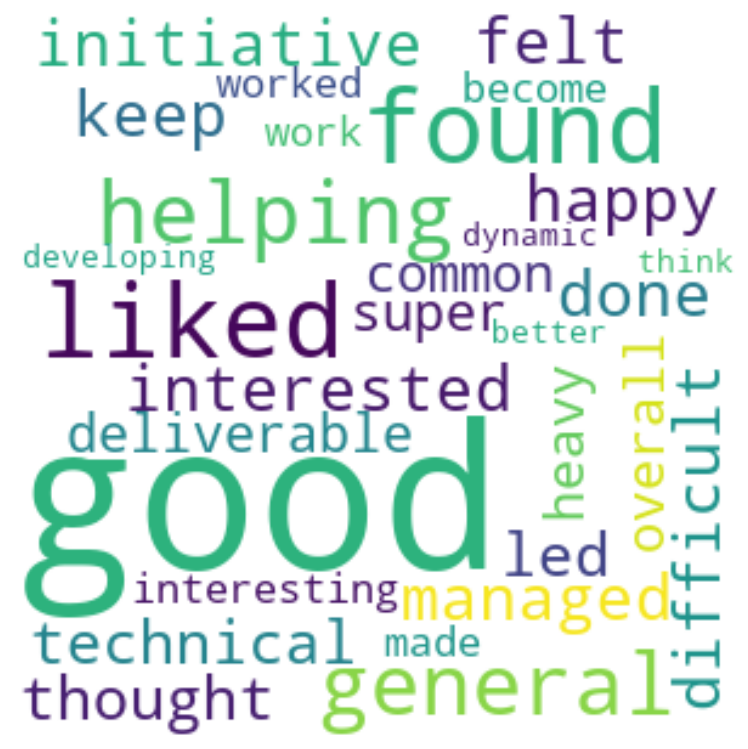

In [671]:
# CLUSTER 5

# Pasar de lista a string
cluster = ""
for i in clustered_sentences[4]:
    cluster = cluster + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(cluster)
tokenized_words = [i.lower() for i in tokenized if (i.isalpha() and len(i)>2)]

no_stopwords = [i for i in tokenized_words if i not in stopword]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

tagged_sent = nltk.pos_tag(lemmatized)

s = ""
for i in tagged_sent:
    if ((i[1]=="JJ") | (i[1]=="VB") | (i[1]=="VBD") | (i[1]=="VBG") | (i[1]=="VBN") | (i[1]=="VBP")):
        s+=i[0]+" "

from wordcloud import WordCloud

wc = WordCloud(width = 300, height = 300, background_color = "white").generate(s)

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()